# Content producing strategy for Netflix to increase user engagement
## D590 – Data Visualization Summer 2022

### Kalyan Dhar, Jugal Shah, and Prasad Yacham


# Introduction
## Motivation
Netflix has been the pioneer in digital content creation and providing entertainment at minimal subscription cost which has changed the trend of entertainment industry. As of June 2022, Netflix has total of 222 million subscribers across the globe. 
Netflix started its business as a mail-based DVD rental company and quickly identified opportunity in online video streaming market. Within few years, Netflix became streaming giant on OTT platforms. In recent times, there were more streaming companies came into the market and provided stiff competitions to Netflix. Amazon Prime, next best to the Netflix, has approx., 200 million subscribers as of June 2022. 

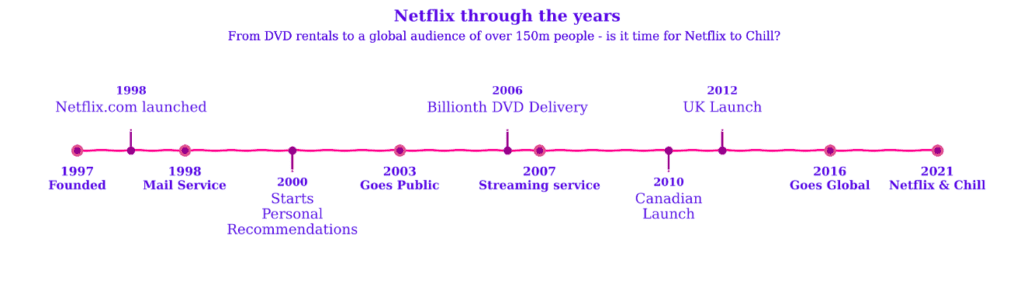

However even with that constant growth, we have observed that recently Netflix stock price is dropping dramatically 

## Imprting Libraries

In [175]:
import plotly as py
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime as dt
import matplotlib
from sklearn.preprocessing import MultiLabelBinarizer 

import yfinance as yf

warnings.filterwarnings("ignore")
%matplotlib inline
py.offline.init_notebook_mode(connected = True)

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710'])
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710','#f5f5f1'])

## Drop in Netflix Stock Price

Even with that constant growth, we have observed that recently Netflix stock price is dropping dramatically. 

[*********************100%***********************]  1 of 1 completed


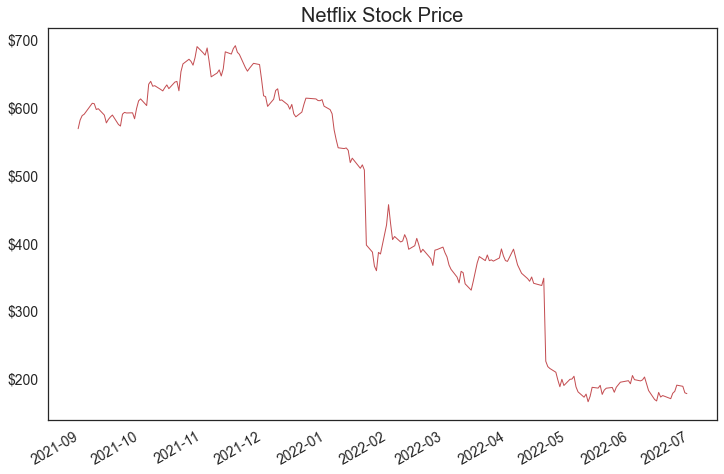

In [176]:
def stock_reader( symbol):

#   print(data)
  tmp_df = yf.download(symbol, start='2015-01-01', end='2022-06-30')[['Adj Close']]
  tmp_df.columns = ['close_'+symbol]
  tmp_df['close_'+symbol] = pd.to_numeric(tmp_df['close_'+symbol])
  tmp_df = tmp_df.sort_index()
  tmp_df.index.name = 'Date'
  return tmp_df

nflx = stock_reader('NFLX')

import matplotlib.ticker as mtick
sns.set_style('white')
plt.figure(figsize = (12,8))
ax = nflx['close_NFLX']['08-31-2021':].plot(color='r', lw=1)
ax.set_title('Netflix Stock Price', fontsize=20)
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
plt.xlabel('')

plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    labelsize=14)

It is possible that due to increasing competition in streaming market, general population are in dilemma of choosing correct streaming platforms for their entertainment needs. In recent times most people constantly binge watch movies or TV shows and hence in order to keep user engagement high, Netflix require to constantly produce new TV shows and movies. In order to increase user engagement, Netflix must go back to its own success and see what types of content kept user engaged. This paper is trying to address those questions and hopes that it will give Netflix insights regarding type of movies and TV shows they need to be produced. 

# Ideas behind visualization
The dataset contains several numerical and categorical columns. Genres, Ratings (PG13, R etc.) and country of origin are few of the categorical columns. while content release and added date are date time functions. These columns can be utilized to provide time series visualization.  Time series visualization will help us envision the trend of current content addition strategy. In addition, we can also recommend the right time to add digital content for each location. 



## Timeseries plot using line chart

We can certainly take advantage of datetime features present in dataset. Timeseries visualization can give us great idea regarding overall trend as well as growth rate.

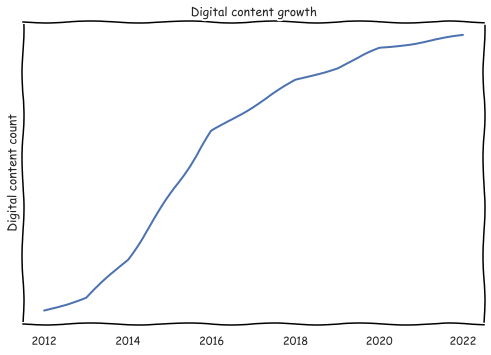

In [177]:
with plt.xkcd():
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    # 
    x = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
    y = [100,200,500,1000,1500,1700,1900,2000,2150,2200, 2250]

    ax.set_yticks([])

    ax.plot(x,y)

    ax.set_xlabel('')
    ax.set_ylabel('Digital content count')
    ax.set_title('Digital content growth')

## Heatmap for correlation

Correlation between different features can be presented using heatmap. Also, we can use crosstab function to generate pivot summary between two categorical features. Heatmap can show it nicely.

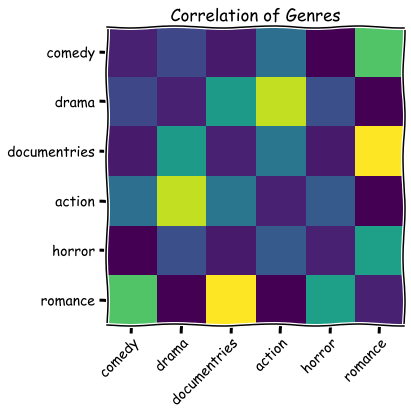

In [3]:
genres = ["comedy", "drama", "documentries", "action",
              "horror", "romance"]

corr_dummy = np.array([[1  , 2.4 , 0.8, 4  , 0.0, 8  ],
                    [2.4, 1.0 , 6.0, 10 , 2.7, 0.0],
                    [0.8, 6.0 , 1.0, 4.3, 0.8, 11 ],
                    [4  , 10.0, 4.3, 1  , 3.1, 0.0],
                    [0.0, 2.7 , 0.8, 3.1, 1  , 6.2],
                    [8  , 0.0 , 11 , 0.0, 6.2, 1  ]
                   ])

with plt.xkcd():
    fig, ax = plt.subplots(figsize=(8,6))
    im = ax.imshow(corr_dummy)

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(genres)))
    ax.set_yticks(np.arange(len(genres)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(genres)
    ax.set_yticklabels(genres)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")


    ax.set_title("Correlation of Genres")
    fig.tight_layout()
    plt.show()


## Simple bar chart

Simple bar chart can be sometimes very useful.It shows comparison of different categorical value very easily.

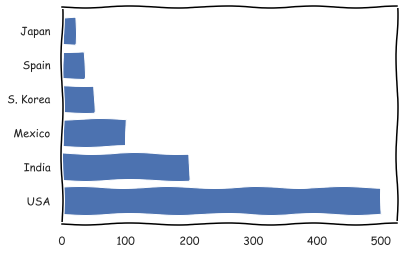

In [178]:
# df_country_group_xkcd = df_country_group[df_country_group['type']=='Movie']

countries = ['USA', 'India', 'Mexico', 'S. Korea', 'Spain', 'Japan']
counts = [500,200,100,50,35,20]
with plt.xkcd():
    plt.barh(countries, counts, )
    plt.ylabel('')

# Reading The data

The dataset analyzed in this paper is obtained from Kaggle (Reference 6).  The dataset contains information regarding current TV-shows and movies on Netflix’s digital catalog. It also provides insight related to each TV-shows and movies in detail with timestamp of content addition, genres of each content and origin country. There are total of more than 8000 movies or TV-shows streaming on Netflix as of mid-2021. Each content has details such as
* Title
* Type of content – Movies or TV Show
* Cast and Director
* Country of origin
* Content release and added date
* Genres
* Rating
* Genres and duration


In [5]:
df = pd.read_csv("data/netflix_titles.csv")
imdb = pd.read_csv('imdb.csv')
df_subs = pd.read_csv('data-h5mYj.csv', usecols=['Country', '# of Subscribers Q2 2021',
                                                 'Average Monthly Revenue per Paying Membership - Q2 2021 ($)' ])

# Missing Data

We can visulize missing data using Heatmap. We can see that Director, cast and Country columns has some missing data. Most columns does not have missing data.

<AxesSubplot:>

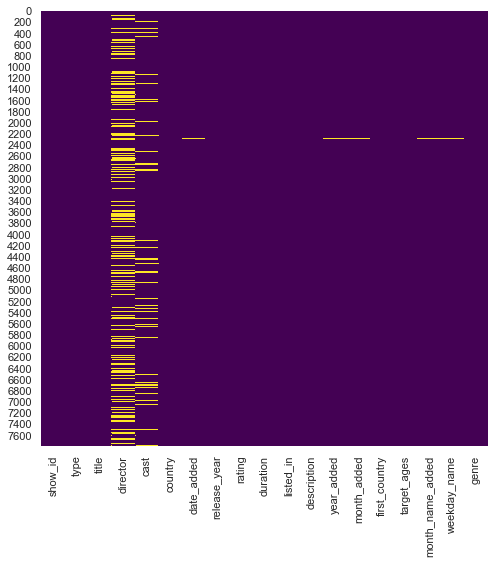

In [128]:
## Missing Data
plt.figure(figsize=(8,8))
sns.heatmap(df.isna(), cmap='viridis', cbar=False)

As we can see there are several missing data in director, cast and country columns

In [7]:
missing_percent= (df.isna().sum()/len(df)).round(4)
missing_percent.map('{:,.2%}'.format)

show_id          0.00%
type             0.00%
title            0.00%
director        30.68%
cast             9.22%
country          6.51%
date_added       0.13%
release_year     0.00%
rating           0.09%
duration         0.00%
listed_in        0.00%
description      0.00%
dtype: object

There are 30% data missing in director column. But other than that we are missing  less than 10% data. For some data we will perform imputation and feature engineering.

# Checking Data Types

In [8]:
## Checking DAta Types
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

As we can see that date_added and duration are object. We need to put correct data types. date_added is object but it should be date time function. We will also add two more columns months and years which can be useful for future reference. 

In [42]:
df["date_added"] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['month_name_added']=df['date_added'].dt.month_name()

# Feature Engineering

Before we dive into data visualization, we should perform some feature engineering. We can modify existing features or crete new features in such a way that it can help us to visualize data nicely.

## Country of origin

In `country` column, some records have multiple name listed. We can create new feature called `'first_country'` to extract one country out of that list. Pandas `lambda` function will help to do that.

In [129]:
df['country'].iloc[11]

'Poland, United States'

Lets first fill missing value by country which occured most times.

In [130]:
print("Missing data in country column : ", df['country'].isna().sum())
df['country'] = df['country'].fillna(df['country'].mode()[0])

Missing data in country column :  0


As we can see, for some rows there are multiple countries listed. One way to clean it is to take first value where multiple country is listed.

In [131]:
df['first_country'] = df['country'].apply(lambda x: x.split(",")[0])
df['first_country'].replace('United States', 'USA', inplace=True)
df['first_country'].replace('United Kingdom', 'UK',inplace=True)
df['first_country'].replace('South Korea', 'S. Korea',inplace=True)

df_subs['Country'].replace('United States', 'USA', inplace=True)
df_subs['Country'].replace('United Kingdom', 'UK',inplace=True)
df_subs['Country'].replace('South Korea', 'S. Korea',inplace=True)

In [132]:
df[['country', 'first_country']].iloc[11]

country          Poland, United States
first_country                   Poland
Name: 11, dtype: object

As we can see that we have accessed first country where there are multiple countries listed.

## Rating and Targetted Age Group

In origianl dataset we have `ratings` column. Rating typically includes which age group should watch the content. We can create dictionary of ratings and then map it to age group. 

In [14]:
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

df['target_ages'] = df['rating'].map(ratings_ages)

In [15]:
df[['rating', 'target_ages']].head()

,rating,target_ages
0,TV-MA,Adults
1,TV-MA,Adults
2,R,Adults
3,PG-13,Teens
4,PG-13,Teens


We can clearly see that based on ratings, what are the targetted age group. These feature can reveal some interesting insights.

## Genres

In original dataset, we have `listed_in` column. These column actually contains informtion that which genres content is listed in. We can extract genre from it using `lambda` function.

In [133]:
df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 

# Data Visualization

### Movies and Film Ratio

We are interested into see distribution of different content types on Netflix. Typically, Netflix has two content types. `Movies` and `TV Shows`. We can look at how these contents are distributed. 

In [134]:
pd.DataFrame(df['type'].value_counts(normalize=True).round(2)).T


,Movie,TV Show
type,0.69,0.31


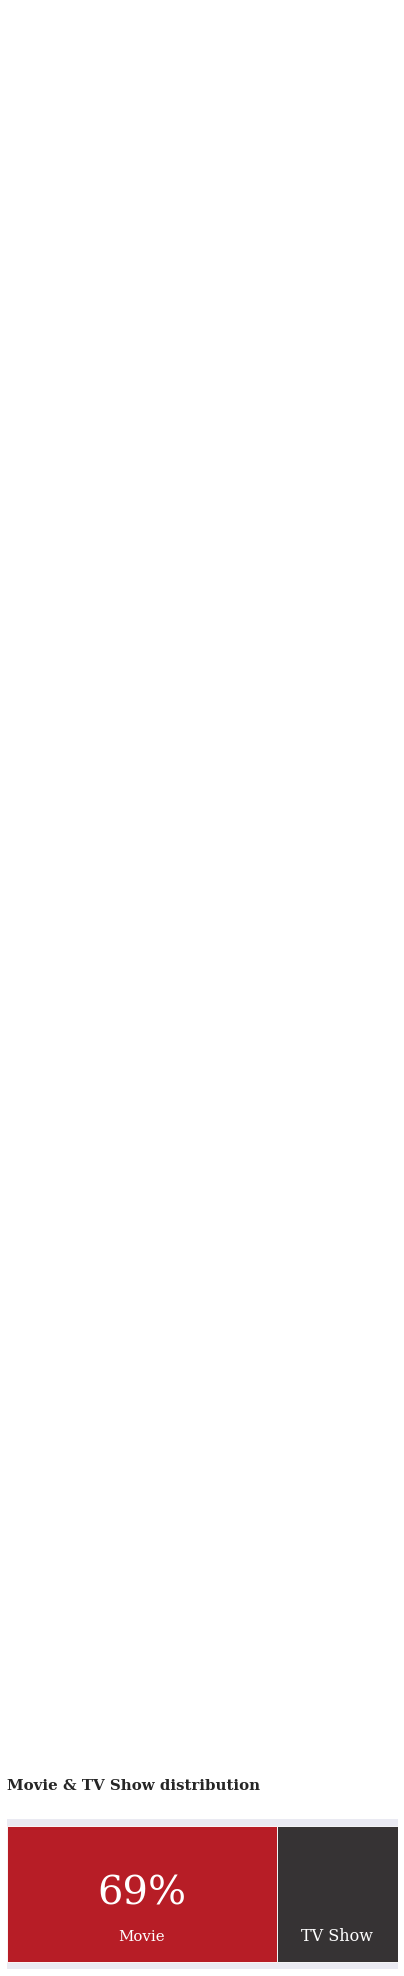

In [138]:
# Vizualization of movies and Tv show
## This codes is referernced from https://www.kaggle.com/code/joshuaswords/netflix-data-visualization

movie_tv_normalized = pd.DataFrame(df['type'].value_counts(normalize=True).round(2)).T.reset_index(drop=True)


fig, ax = plt.subplots(1,1,figsize=(7, 2.75))

ax.barh(movie_tv_normalized.index, movie_tv_normalized['Movie'], 
        color='#b20710', alpha=0.9, label='Movie')
ax.barh(movie_tv_normalized.index, movie_tv_normalized['TV Show'], left=movie_tv_normalized['Movie'], 
        color='#221f1f', alpha=0.9, label='TV Show')



ax.annotate(f"{int(movie_tv_normalized['Movie'][0]*100)}%", 
               xy=(movie_tv_normalized['Movie'][0]/2, 0),
               va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
               color='white')

ax.annotate("Movie", 
               xy=(movie_tv_normalized['Movie'][0]/2, -0.25),
               va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
               color='white')
    
    

ax.annotate(f"{int(movie_tv_normalized['TV Show'][0]*100)}%", 
               xy=(movie_tv_normalized['Movie'][0]+movie_tv_normalized['TV Show'][0]/2, i),
               va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
               color='white')
        
ax.annotate("TV Show", 
               xy=(movie_tv_normalized['Movie'][0]+movie_tv_normalized['TV Show'][0]/2, -0.25),
               va = 'center', ha='center',fontsize=16, fontweight='light', fontfamily='serif',
               color='white')



# Title & Subtitle
fig.text(0.125,1.03,'Movie & TV Show distribution', fontfamily='serif',fontsize=15, fontweight='bold')


# Removing legend due to labelled plot
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
ax.legend().set_visible(False)
ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])
plt.show()

## New content addition growth rate

Now that we know almost 69% content on Netflix in movies. We can visualize some timeseries plots. Timeseries plots will give us ideas about overall trend and growth rate.

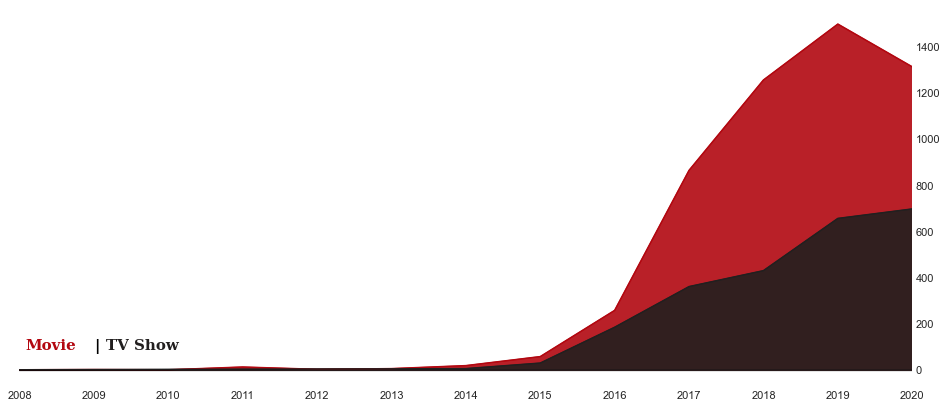

In [146]:
sns.set_style('white')
fig, ax = plt.subplots(1, 1, figsize=(16, 7))
color = ["#b20710", "#221f1f"]

for i, mtv in enumerate(df['type'].value_counts().index):
    mtv_rel = df[df['type']==mtv]['year_added'].value_counts().sort_index()
    ax.plot(mtv_rel.index, mtv_rel, color=color[i], label=mtv)
    ax.fill_between(mtv_rel.index, 0, mtv_rel, color=color[i], alpha=0.9)
    
ax.yaxis.tick_right()
    
ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

#ax.set_ylim(0, 50)
#ax.legend(loc='upper left')
for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)

ax.grid(False)

ax.set_xlim(2008,2020)
plt.xticks(np.arange(2008, 2021, 1))

# fig.text(0.13, 0.85, 'Movies & TV Shows added over time', fontsize=15, fontweight='bold', fontfamily='serif')
# fig.text(0.13, 0.59, 
# '''We see a slow start for Netflix over several years. 
# Things begin to pick up in 2015 and then there is a 
# rapid increase from 2016.

# It looks like content additions have slowed down in 2020, 
# likely due to the COVID-19 pandemic.
# '''

, fontsize=12, fontweight='light', fontfamily='serif')


fig.text(0.13,0.2,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.19,0.2,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.2,0.2,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

This tell us that Netflix has constantly added movies and TV shows.It would be interesting to see growth rate over time to see if Netflix growth of adding new contents. **is Netflix content addition growing?**

In [141]:
df_year= df[df.year_added.isin(list(range(2013,2020)))].groupby(['year_added', 'type'], as_index=False)['show_id'].count()

df_year_pivot = df_year.pivot_table(index='year_added', columns='type', values='show_id').reset_index()
df_year_pivot['movie_cumsum'] = df_year_pivot['Movie'].cumsum()
df_year_pivot['tvshow_cumsum'] = df_year_pivot['TV Show'].cumsum()
df_year_pivot['movie_growth'] = df_year_pivot['Movie'].diff()
df_year_pivot['tvshow_growth'] = df_year_pivot['TV Show'].diff()
# # df_year_pivot['movie_diff'] = 
df_year_pivot['per_movie'] = (df_year_pivot.movie_cumsum.pct_change(fill_method ='ffill') * 100).round(0)
df_year_pivot['per_TVshow'] = (df_year_pivot['tvshow_cumsum'].pct_change(fill_method ='ffill') * 100).round(0)
df_year_pivot.dropna(inplace=True)
df_year_pivot['year_added'] = df_year_pivot['year_added'].astype('int')
df_year_pivot

type,year_added,Movie,TV Show,movie_cumsum,tvshow_cumsum,movie_growth,tvshow_growth,per_movie,per_TVshow
1,2014,19,6,25,11,13.0,1.0,317.0,120.0
2,2015,58,30,83,41,39.0,24.0,232.0,273.0
3,2016,258,185,341,226,200.0,155.0,311.0,451.0
4,2017,864,361,1205,587,606.0,176.0,253.0,160.0
5,2018,1255,430,2460,1017,391.0,69.0,104.0,73.0
6,2019,1497,656,3957,1673,242.0,226.0,61.0,65.0


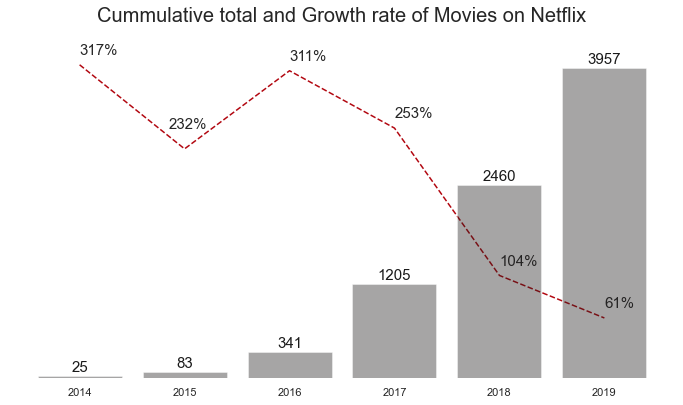

In [145]:
ax1 = sns.set_style(style='white', rc=None )
fig, ax1 = plt.subplots(figsize=(12,6))
# sns.set_style('white')


['#221f1f', '#b20710']
color=['#239c0e','#158701','#3f6e23','#30541a','#1b3b08','#203d0f']
color=['#b20710','#b20710','#b20710','#b20710','#b20710','#b20710']
ax1.plot(df_year_pivot['year_added'],df_year_pivot['per_movie'],color='#b20710', alpha=1, linestyle='--')
ax2 = ax1.twinx()
ax2.bar(df_year_pivot['year_added'], df_year_pivot['movie_cumsum'], color='#221f1f', alpha=0.4)
for bar in ax2.patches:
    ax2.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',color='k',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
prev=0
for i,j in zip(df_year_pivot['year_added'],df_year_pivot['per_movie']):
    prev= i
    if i==2015:
        ax1.annotate(str(int(j))+'%', xy=(i-0.15, j+20), size=15)
    else:
        ax1.annotate(str(int(j))+'%', xy=(i, j+10), size=15)
for s in ['top', 'right','bottom','left']:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
ax1.set_ylim( ymin=0)
ax1.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelright=False,
    labelleft=False   ) # labels along the bottom edge are off
ax2.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelright=False,
    labelleft=False   ) # labels along the bottom edge are off
plt.title('Cummulative total and Growth rate of Movies on Netflix', fontsize=20, pad=30)
plt.show()



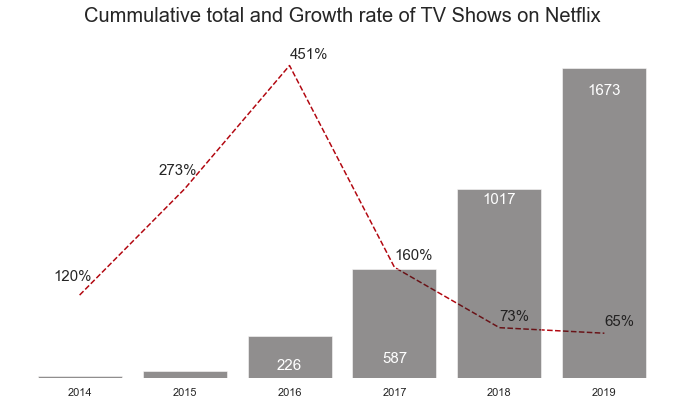

In [144]:
ax1 = sns.set_style(style='white', rc=None )
fig, ax1 = plt.subplots(figsize=(12,6))
# sns.set_style('white')


['#221f1f', '#b20710']
color=['#239c0e','#158701','#3f6e23','#30541a','#1b3b08','#203d0f']
color=['#b20710','#b20710','#b20710','#b20710','#b20710','#b20710']
ax1.plot(df_year_pivot['year_added'],df_year_pivot['per_TVshow'],color='#b20710', alpha=1, linestyle='--')
ax2 = ax1.twinx()
ax2.bar(df_year_pivot['year_added'], df_year_pivot['tvshow_cumsum'], color='#221f1f', alpha=0.5)
for bar in ax2.patches:
    if (bar.get_height() > 200) & (bar.get_x()==2015.6 or bar.get_x()==2016.6):
        ax2.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    0.1*bar.get_height()), ha='center', va='center',color='white',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
    elif (bar.get_height() > 200) & (bar.get_x()==2017.6 or bar.get_x()==2018.6):
        ax2.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    0.9*bar.get_height()), ha='center', va='center',color='white',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
prev=0
for i,j in zip(df_year_pivot['year_added'],df_year_pivot['per_TVshow']):
    prev= i
    if ((i==2015) or (i==2014)):
        ax1.annotate(str(int(j))+'%', xy=(i-0.25, j+20), size=15)
    else:
        ax1.annotate(str(int(j))+'%', xy=(i, j+10), size=15)
for s in ['top', 'right','bottom','left']:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
ax1.set_ylim( ymin=0)
ax1.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelright=False,
    labelleft=False   ) # labels along the bottom edge are off
ax2.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelright=False,
    labelleft=False   ) # labels along the bottom edge are off
plt.title('Cummulative total and Growth rate of TV Shows on Netflix', fontsize=20, pad=30)
plt.show()


## Chorpleth vs Bar Chart

We can use Choropleth to visualize maps. However, map visualization has several limitations. Chropleth, generally allows one numerical feature at a time. We can see which country is adding how much content, but we can not compare between addition of TV-shows and movies.

In [147]:
country_codes = {'afghanistan': 'AFG',
 'albania': 'ALB',
 'algeria': 'DZA',
 'american samoa': 'ASM',
 'andorra': 'AND',
 'angola': 'AGO',
 'anguilla': 'AIA',
 'antigua and barbuda': 'ATG',
 'argentina': 'ARG',
 'armenia': 'ARM',
 'aruba': 'ABW',
 'australia': 'AUS',
 'austria': 'AUT',
 'azerbaijan': 'AZE',
 'bahamas': 'BHM',
 'bahrain': 'BHR',
 'bangladesh': 'BGD',
 'barbados': 'BRB',
 'belarus': 'BLR',
 'belgium': 'BEL',
 'belize': 'BLZ',
 'benin': 'BEN',
 'bermuda': 'BMU',
 'bhutan': 'BTN',
 'bolivia': 'BOL',
 'bosnia and herzegovina': 'BIH',
 'botswana': 'BWA',
 'brazil': 'BRA',
 'british virgin islands': 'VGB',
 'brunei': 'BRN',
 'bulgaria': 'BGR',
 'burkina faso': 'BFA',
 'burma': 'MMR',
 'burundi': 'BDI',
 'cabo verde': 'CPV',
 'cambodia': 'KHM',
 'cameroon': 'CMR',
 'canada': 'CAN',
 'cayman islands': 'CYM',
 'central african republic': 'CAF',
 'chad': 'TCD',
 'chile': 'CHL',
 'china': 'CHN',
 'colombia': 'COL',
 'comoros': 'COM',
 'congo democratic': 'COD',
 'Congo republic': 'COG',
 'cook islands': 'COK',
 'costa rica': 'CRI',
 "cote d'ivoire": 'CIV',
 'croatia': 'HRV',
 'cuba': 'CUB',
 'curacao': 'CUW',
 'cyprus': 'CYP',
 'czech republic': 'CZE',
 'denmark': 'DNK',
 'djibouti': 'DJI',
 'dominica': 'DMA',
 'dominican republic': 'DOM',
 'ecuador': 'ECU',
 'egypt': 'EGY',
 'el salvador': 'SLV',
 'equatorial guinea': 'GNQ',
 'eritrea': 'ERI',
 'estonia': 'EST',
 'ethiopia': 'ETH',
 'falkland islands': 'FLK',
 'faroe islands': 'FRO',
 'fiji': 'FJI',
 'finland': 'FIN',
 'france': 'FRA',
 'french polynesia': 'PYF',
 'gabon': 'GAB',
 'gambia, the': 'GMB',
 'georgia': 'GEO',
 'germany': 'DEU',
 'ghana': 'GHA',
 'gibraltar': 'GIB',
 'greece': 'GRC',
 'greenland': 'GRL',
 'grenada': 'GRD',
 'guam': 'GUM',
 'guatemala': 'GTM',
 'guernsey': 'GGY',
 'guinea-bissau': 'GNB',
 'guinea': 'GIN',
 'guyana': 'GUY',
 'haiti': 'HTI',
 'honduras': 'HND',
 'hong kong': 'HKG',
 'hungary': 'HUN',
 'iceland': 'ISL',
 'india': 'IND',
 'indonesia': 'IDN',
 'iran': 'IRN',
 'iraq': 'IRQ',
 'ireland': 'IRL',
 'isle of man': 'IMN',
 'israel': 'ISR',
 'italy': 'ITA',
 'jamaica': 'JAM',
 'japan': 'JPN',
 'jersey': 'JEY',
 'jordan': 'JOR',
 'kazakhstan': 'KAZ',
 'kenya': 'KEN',
 'kiribati': 'KIR',
 'north korea': 'PRK',
 'south korea': 'KOR',
 'kosovo': 'KSV',
 'kuwait': 'KWT',
 'kyrgyzstan': 'KGZ',
 'laos': 'LAO',
 'latvia': 'LVA',
 'lebanon': 'LBN',
 'lesotho': 'LSO',
 'liberia': 'LBR',
 'libya': 'LBY',
 'liechtenstein': 'LIE',
 'lithuania': 'LTU',
 'luxembourg': 'LUX',
 'macau': 'MAC',
 'macedonia': 'MKD',
 'madagascar': 'MDG',
 'malawi': 'MWI',
 'malaysia': 'MYS',
 'maldives': 'MDV',
 'mali': 'MLI',
 'malta': 'MLT',
 'marshall islands': 'MHL',
 'mauritania': 'MRT',
 'mauritius': 'MUS',
 'mexico': 'MEX',
 'micronesia': 'FSM',
 'moldova': 'MDA',
 'monaco': 'MCO',
 'mongolia': 'MNG',
 'montenegro': 'MNE',
 'morocco': 'MAR',
 'mozambique': 'MOZ',
 'namibia': 'NAM',
 'nepal': 'NPL',
 'netherlands': 'NLD',
 'new caledonia': 'NCL',
 'new zealand': 'NZL',
 'nicaragua': 'NIC',
 'nigeria': 'NGA',
 'niger': 'NER',
 'niue': 'NIU',
 'northern mariana islands': 'MNP',
 'norway': 'NOR',
 'oman': 'OMN',
 'pakistan': 'PAK',
 'palau': 'PLW',
 'panama': 'PAN',
 'papua new guinea': 'PNG',
 'paraguay': 'PRY',
 'peru': 'PER',
 'philippines': 'PHL',
 'poland': 'POL',
 'portugal': 'PRT',
 'puerto rico': 'PRI',
 'qatar': 'QAT',
 'romania': 'ROU',
 'russia': 'RUS',
 'rwanda': 'RWA',
 'saint kitts and nevis': 'KNA',
 'saint lucia': 'LCA',
 'saint martin': 'MAF',
 'saint pierre and miquelon': 'SPM',
 'saint vincent and the grenadines': 'VCT',
 'samoa': 'WSM',
 'san marino': 'SMR',
 'sao tome and principe': 'STP',
 'saudi arabia': 'SAU',
 'senegal': 'SEN',
 'serbia': 'SRB',
 'seychelles': 'SYC',
 'sierra leone': 'SLE',
 'singapore': 'SGP',
 'sint maarten': 'SXM',
 'slovakia': 'SVK',
 'slovenia': 'SVN',
 'solomon islands': 'SLB',
 'somalia': 'SOM',
 'south africa': 'ZAF',
 'south sudan': 'SSD',
 'spain': 'ESP',
 'sri lanka': 'LKA',
 'sudan': 'SDN',
 'suriname': 'SUR',
 'swaziland': 'SWZ',
 'sweden': 'SWE',
 'switzerland': 'CHE',
 'syria': 'SYR',
 'taiwan': 'TWN',
 'tajikistan': 'TJK',
 'tanzania': 'TZA',
 'thailand': 'THA',
 'timor-leste': 'TLS',
 'togo': 'TGO',
 'tonga': 'TON',
 'trinidad and tobago': 'TTO',
 'tunisia': 'TUN',
 'turkey': 'TUR',
 'turkmenistan': 'TKM',
 'tuvalu': 'TUV',
 'uganda': 'UGA',
 'ukraine': 'UKR',
 'united arab emirates': 'ARE',
 'united kingdom': 'GBR',
 'united states': 'USA',
 'uruguay': 'URY',
 'uzbekistan': 'UZB',
 'vanuatu': 'VUT',
 'venezuela': 'VEN',
 'vietnam': 'VNM',
 'virgin islands': 'VGB',
 'west bank': 'WBG',
 'yemen': 'YEM',
 'zambia': 'ZMB',
 'zimbabwe': 'ZWE'}


In [148]:
## countries 
from collections import Counter
colorscale = ["#f7fbff", "#ebf3fb", "#deebf7", "#d2e3f3", "#c6dbef", "#b3d2e9", "#9ecae1",
    "#85bcdb", "#6baed6", "#57a0ce", "#4292c6", "#3082be", "#2171b5", "#1361a9",
    "#08519c", "#0b4083", "#08306b"
]
    
def geoplot(ddf):
    country_with_code, country = {}, {}
    shows_countries = ", ".join(ddf['country'].dropna()).split(", ")
    for c,v in dict(Counter(shows_countries)).items():
        code = ""
        if c.lower() in country_codes:
            code = country_codes[c.lower()]
        country_with_code[code] = v
        country[c] = v

    data = [dict(
            type = 'choropleth',
            locations = list(country_with_code.keys()),
            z = list(country_with_code.values()),
            colorscale = [[0,"rgb(5, 10, 172)"],[0.65,"rgb(40, 60, 190)"],[0.75,"rgb(70, 100, 245)"],\
                        [0.80,"rgb(90, 120, 245)"],[0.9,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
            autocolorscale = False,
            reversescale = True,
            marker = dict(
                line = dict (
                    color = 'gray',
                    width = 0.5
                ) ),
            colorbar = dict(
                autotick = False,
                title = ''),
          ) ]
#     print(data)
    layout = dict(
        title = "Distirbution of content across globe",
        geo = dict(
            showframe = False,
            showcoastlines = False,
            projection = dict(
                type = 'Mercator'
            )
        )
    )

    fig = dict( data=data, layout=layout )
    iplot( fig, validate=False, filename='d3-world-map' )
    
    return country

country_vals = geoplot(df)
tabs = Counter(country_vals).most_common(25)

# labels = [_[0] for _ in tabs][::-1]
# values = [_[1] for _ in tabs][::-1]
# trace1 = go.Bar(y=labels, x=values, orientation="h", name="", marker=dict(color="#a678de"))

# data = [trace1]
# layout = go.Layout(title="Countries with most content", height=700, legend=dict(x=0.1, y=1.1, orientation="h"))
# fig = go.Figure(data, layout=layout)
# fig.show()

As we can see **Choropleth** reveals one parameter but does not provide comparison between `Movies` and `TV Shows`. Simple bar chart can do this job easily. 

In [149]:
df_all_country = list(df.groupby(['first_country'], as_index=False)['show_id'].count().sort_values(
    by='show_id', ascending=False)[:10].first_country.values)

df_country_group = df[df['first_country'].isin(df_all_country)].groupby([
    'first_country', 'type'], as_index=False)['show_id'].count()



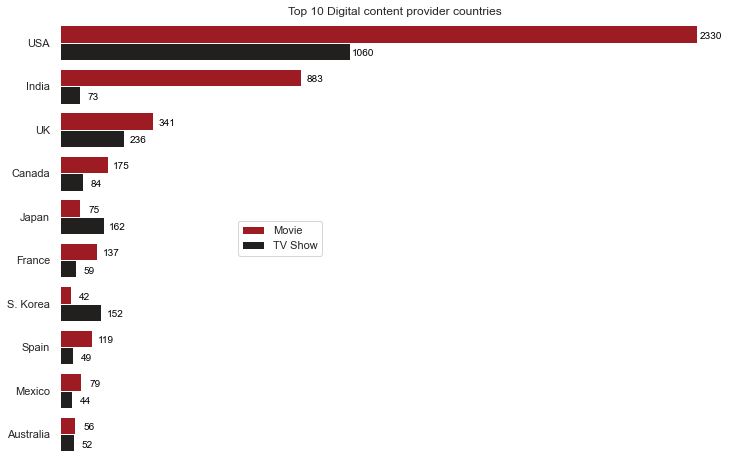

In [150]:
plt.figure(figsize=(12,8))
chart = sns.barplot(x='show_id', y = 'first_country', hue='type',
                    data = df_country_group, palette=['#b20710', '#221f1f'], order = df_all_country)
chart.set_title('Top 10 Digital content provider countries')
for p in chart.patches:
             chart.annotate("%.0f" % p.get_width(), ( p.get_width()+50,p.get_y() + p.get_height()*0.9),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')
plt.ylabel('')
plt.xlabel('')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
plt.legend(loc="center right", bbox_to_anchor=(0.4,0.5))
plt.show()

Bar chart provides better visualization in this case. it also reveals that for Japanes and Koreans contents, there are more TV-shoes than Movies.

## Seasonal Analysis
Seasonal analysis involves analysis over a period of year or sometime over a week. It will help us to identify which month is ideal to release new content on Netflix. Also it reveals which day is ideal to release contents.

### Which month is best?


In [151]:
month_order = ['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

df['month_name_added'] = pd.Categorical(df['month_name_added'], categories=month_order, ordered=True)

# display(df.head())

month_order = ['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

df['month_name_added'] = pd.Categorical(df['month_name_added'], categories=month_order, ordered=True)



data_sub = df.groupby(['month_name_added','type'])['month_added'].count().unstack().fillna(0)

data_sub.head()
data_sub2 = data_sub
# display(data_sub2.head())
data_sub2['Value'] = data_sub2['Movie'] + data_sub2['TV Show']
data_sub2 = data_sub2.reset_index()

df_polar = data_sub2.sort_values(by='month_name_added',ascending=False)
df_polar['movie_normalize'] = (df_polar['Movie']/df_polar['Movie'].sum()).round(4)
df_polar['tv_normalize'] = (df_polar['TV Show']/df_polar['TV Show'].sum()).round(4)

df_polar.head()

type,month_name_added,Movie,TV Show,Value,movie_normalize,tv_normalize
11,December,554,279,833,0.1030,0.1162
10,November,511,227,738,0.0950,0.0946
9,October,553,232,785,0.1028,0.0967
8,September,415,204,619,0.0772,0.0850
7,August,414,204,618,0.0770,0.0850


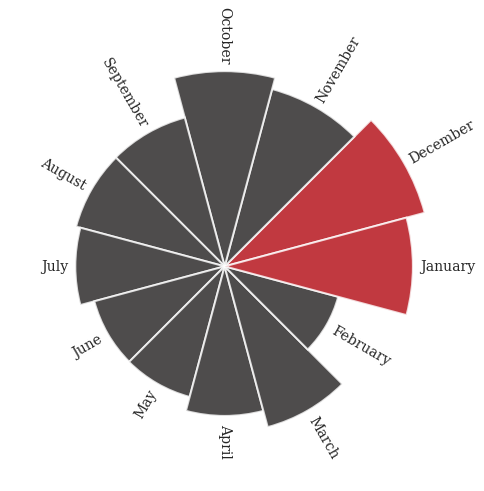

In [152]:

color_map = ['#221f1f' for _ in range(12)]
color_map[0] = color_map[11] =  '#b20710' # color highlight


# initialize the figure
plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Constants = parameters controling the plot layout:
upperLimit = 30
lowerLimit = 1
labelPadding = 30

# Compute max and min in the dataset
max = df_polar['Value'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * df_polar.Value + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df_polar.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df_polar.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color=color_map,alpha=0.8
)



# Add labels
for bar, angle, height, label in zip(bars,angles, heights, df_polar["month_name_added"]):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, fontsize=10,fontfamily='serif',
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor",
        size=14) 

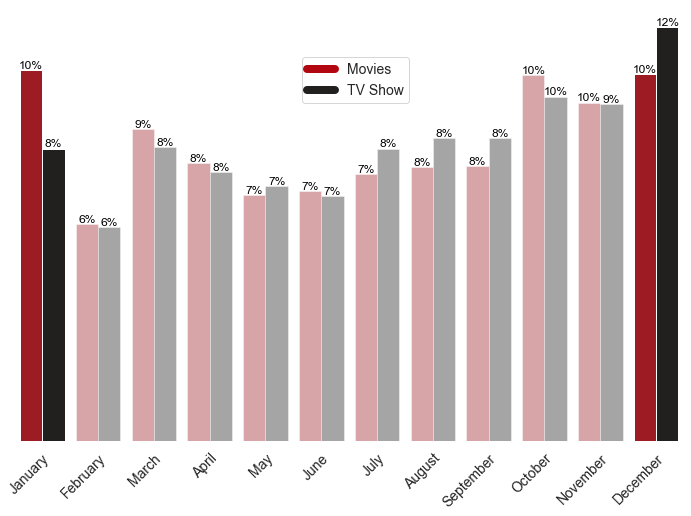

In [153]:

sns.set_style("white")
df_unpolar = df_polar[['month_name_added', 'movie_normalize', 'tv_normalize']].sort_index().melt(
    id_vars='month_name_added', value_vars=['movie_normalize', 'tv_normalize'])

plt.figure(figsize=(12,8))
ax = sns.barplot(x = 'month_name_added', y = 'value', hue='type', data = df_unpolar, palette=['#b20710','#221f1f'])

for i in range(12):    
    if (i!=0)&(i!=11):
        ax.containers[0][i].set_alpha(0.4)
        ax.containers[1][i].set_alpha(0.4)   
for p in ax.patches:
             ax.annotate('{:,.0%}'.format(p.get_height()), ( p.get_x()+p.get_width()/2,p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),alpha=1,
                 textcoords='offset points')

# plt.legend(title='', loc='upper left', labels=['Movies', 'TV Show'])
leg = plt.legend(title='', bbox_to_anchor=(0.6,0.9), labels=['Movies', 'TV Show'], fontsize=14)
leg.legendHandles[0].set_color('#b20710')
leg.legendHandles[1].set_color('#221f1f')
for legobj in leg.legendHandles:
    legobj.set_linewidth(8.0)
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
plt.ylabel('')
plt.xlabel('')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
plt.grid(visible=False)
ax = plt.axes()
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    right=False,      # ticks along the bottom edge are off
    left=False,         # ticks along the top edge are off
    labelleft=False)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    labelsize=14)

plt.show()

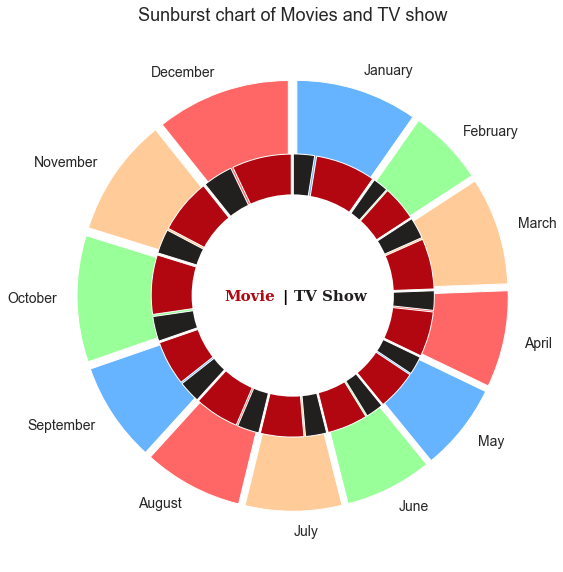

In [155]:
labels = list(df_polar['month_name_added'])
sizes = list(df_polar['Value'])
labels_gender = ['Movie','TV Show',
                 'Movie','TV Show',
                 'Movie','TV Show',
                 'Movie','TV Show',
                 'Movie','TV Show',
                 'Movie','TV Show',
                 'Movie','TV Show',
                 'Movie','TV Show',
                 'Movie','TV Show',
                 'Movie','TV Show',
                 'Movie','TV Show',
                 'Movie','TV Show',]

sizes_type = [x for z in zip(list(df_polar['Movie'].values), list(df_polar['TV Show'].values)) for x in z]

colors = ['#ff6666', '#ffcc99', '#99ff99', '#66b3ff']+\
        ['#ff6666', '#ffcc99', '#99ff99', '#66b3ff']+\
        ['#ff6666', '#ffcc99', '#99ff99', '#66b3ff']
colors_gender = ['#b20710','#221f1f', 
                 '#b20710','#221f1f', 
                 '#b20710','#221f1f', 
                 '#b20710','#221f1f', 
                 '#b20710','#221f1f', 
                 '#b20710','#221f1f', 
                 '#b20710','#221f1f', 
                 '#b20710','#221f1f', 
                 '#b20710','#221f1f', 
                 '#b20710','#221f1f', 
                 '#b20710','#221f1f', 
                 '#b20710','#221f1f', 
                ]
explode = (0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2) 
explode_gender = (0.1,0.1,
                  0.1,0.1,
                  0.1,0.1,
                  0.1,0.1,
                  0.1,0.1,
                  0.1,0.1,
                  0.1,0.1,
                  0.1,0.1,
                  0.1,0.1,
                  0.1,0.1,
                  0.1,0.1,
                  0.1,0.1
                 )
#Plot ['#221f1f', '#b20710']
plt.figure(figsize=(8,8))
plt.pie(sizes, labels=labels, colors=colors, startangle=90,frame=True, explode=explode,radius=3,
        textprops={'fontsize': 14})
plt.pie(sizes_type,colors=colors_gender,startangle=90, explode=explode_gender,radius=2 )
#Draw circle
centre_circle = plt.Circle((0,0),1.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
fig.text(0.4,0.5,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.5,0.5,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.52,0.5,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')
plt.axis('equal')
# plt.legend()
plt.tight_layout()
plt.title("Sunburst chart of Movies and TV show", fontsize=18)
plt.show()

Month of December and January are ideal to release new contents.

### Which Weekday is best?

In [156]:
df['weekday_name'] = df['date_added'].dt.day_name()
df_polar_day = df.groupby(['weekday_name', 'type'], as_index=False)['show_id'].count()


df_polar_pivot = df_polar_day.pivot_table(index='weekday_name', columns='type', values='show_id').reset_index()
sorter_day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sorterIndex = dict(zip(sorter_day, range(len(sorter_day))))
df_polar_pivot['rank'] = df_polar_pivot.weekday_name .map(sorterIndex)
df_polar_pivot['total'] = df_polar_pivot['Movie'] + df_polar_pivot['TV Show']
df_polar_pivot = df_polar_pivot.sort_values(by = ['rank'])

df_polar_pivot

type,weekday_name,Movie,TV Show,rank,total
1,Monday,600,214,0,814
5,Tuesday,785,285,1,1070
6,Wednesday,727,293,2,1020
4,Thursday,848,299,3,1147
0,Friday,1392,895,4,2287
2,Saturday,490,241,5,731
3,Sunday,535,173,6,708


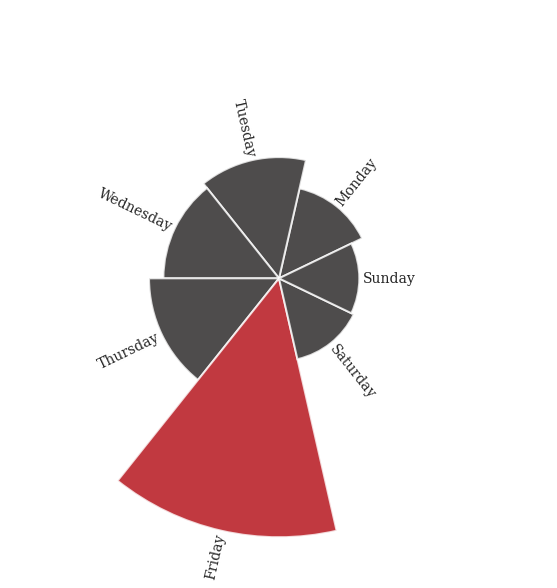

In [157]:
color_map = ['#221f1f' for _ in range(7)]
color_map[4] =  '#b20710' # color highlight


# initialize the figure
plt.figure(figsize=(10,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Constants = parameters controling the plot layout:
upperLimit = 30
lowerLimit = 1
labelPadding = 30

# Compute max and min in the dataset
max = df_polar_pivot['total'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * df_polar_pivot.total + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df_polar_pivot.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df_polar_pivot.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color=color_map,alpha=0.8
)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    labelsize=12)

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, df_polar_pivot["weekday_name"]):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, fontsize=10,fontfamily='serif',
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor",
        size=14) 

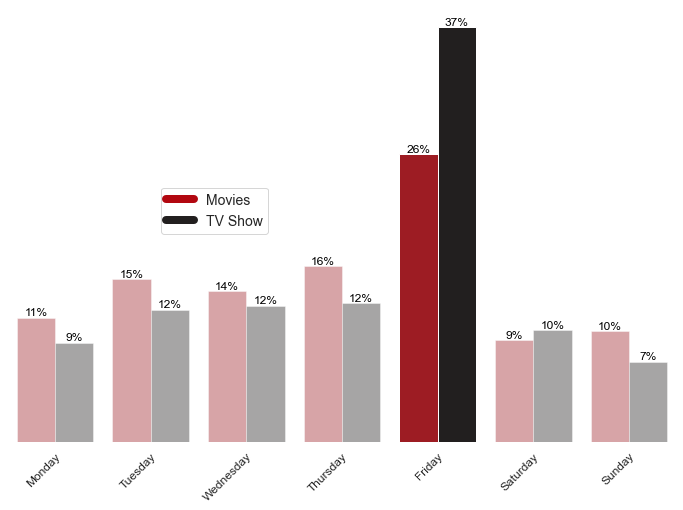

In [158]:
sns.set_style("white")
df_polar_pivot['movie_normalize'] = (df_polar_pivot['Movie']/df_polar_pivot['Movie'].sum()).round(4)
df_polar_pivot['tv_normalize'] = (df_polar_pivot['TV Show']/df_polar_pivot['TV Show'].sum()).round(4)

df_unpolar = df_polar_pivot[['weekday_name', 'movie_normalize', 'tv_normalize']].melt(
    id_vars='weekday_name', value_vars=['movie_normalize', 'tv_normalize'])

plt.figure(figsize=(12,8))
ax = sns.barplot(x = 'weekday_name', y = 'value', hue='type', data = df_unpolar, palette=['#b20710','#221f1f'], alpha=1)
for i in range(7):
    if i!=4:
        ax.containers[0][i].set_alpha(0.4)
        ax.containers[1][i].set_alpha(0.4)   
for p in ax.patches:
             ax.annotate('{:,.0%}'.format(p.get_height()), ( p.get_x()+p.get_width()/2,p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),alpha=1,
                 textcoords='offset points')
    
leg = plt.legend(title='', bbox_to_anchor=(0.4,0.6), labels=['Movies', 'TV Show'], fontsize=14)
leg.legendHandles[0].set_color('#b20710')
leg.legendHandles[1].set_color('#221f1f')
for legobj in leg.legendHandles:
    legobj.set_linewidth(8.0)
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
plt.ylabel('')
plt.xlabel('')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
plt.grid(visible=False)
ax = plt.axes()
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
# ax.set_facecolor("white")
# ax.spines['bottom'].set_color('black')
# ax.spines['left'].set_color('black')
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    right=False,      # ticks along the bottom edge are off
    left=False,         # ticks along the top edge are off
    labelleft=False,
     labelsize=12)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    labelsize=12)
# ax.tick_params(axis='both', which='major', labelsize=10)
plt.show()

Majority of content released on Friday. As most people across the globe observe weekends on Saturday and Sunday, it is better to release new content on Friday. 

## Heatmaps and Correlations

### Which age group Netflix should target?


We can find correlation between countries and targetted age group using pandas `crosstab` fucntion. It can provide insight such as which age group Netflix should target.

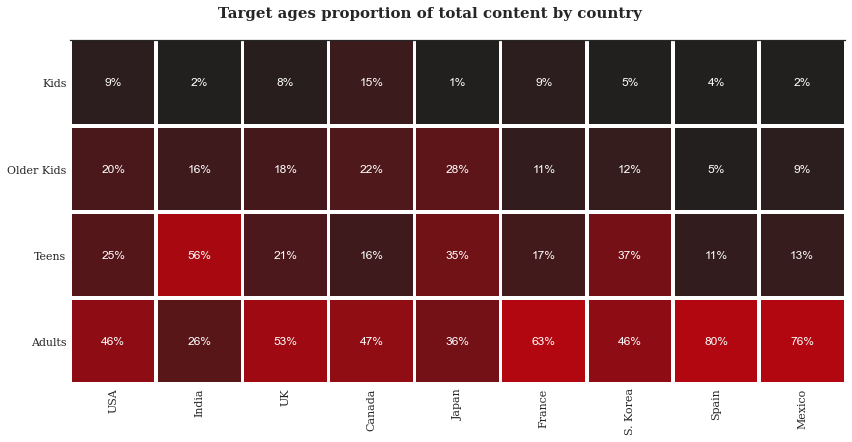

In [160]:
data = df.groupby('first_country', as_index=False)['show_id'].count().sort_values(
    by='show_id',ascending=False).reset_index(drop=True)[:10]
data = data['first_country']


df_heatmap = df.loc[df['first_country'].isin(data)]


df_heatmap = pd.crosstab(df_heatmap['first_country'],df_heatmap['target_ages'],normalize = "index").T





fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order2 = ['USA', 'India', 'UK', 'Canada', 'Japan', 'France', 'S. Korea', 'Spain',
       'Mexico', ]

age_order = ['Kids','Older Kids','Teens','Adults']

sns.heatmap(df_heatmap.loc[age_order,country_order2],cmap=cmap,square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})

ax.spines['top'].set_visible(True)


fig.text(.75, .725, 'Target ages proportion of total content by country', fontweight='bold', fontfamily='serif', fontsize=15,ha='right')   
# fig.text(0.99, 0.7, 'Here we see interesting differences between countries. Most shows in India are targeted to teens, for instance.',ha='right', fontsize=12,fontfamily='serif') 

ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)

ax.set_ylabel('')    
ax.set_xlabel('')
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.tight_layout()
plt.show()

Further correlation between various age groups and countries is also provides different insights. In India, teen age audience is more engaged on Netflix. Again, this correlation shows that there are very less content available for kids. This is potential untapped market that Netflix should target.

### Countries and Genres

We can find correlation between countries and genres using pandas `crosstab` fucntion. It can provide insight such as which genres Netflix should target for each country.

In [161]:


df_gencon = df[df['first_country'].isin(df_all_country)][['genre', 'first_country']]
df_gencon['genre1'] = df_gencon['genre'].apply(lambda x : x[0])
df_gencon['genre2'] = df_gencon['genre'].apply(lambda x : x[1] if len(x)>1 else np.nan)
df_gencon['genre3'] = df_gencon['genre'].apply(lambda x : x[2] if len(x)>2 else np.nan)
df_gencon['genre4'] = df_gencon['genre'].apply(lambda x : x[3] if len(x)>3 else np.nan)
df_gencon['genre5'] = df_gencon['genre'].apply(lambda x : x[4] if len(x)>4 else np.nan)

df_gencon = pd.concat([df_gencon[['first_country', 'genre1']].rename(columns={'genre1':'genre'}),
                       df_gencon[['first_country', 'genre2']].rename(columns={'genre2':'genre'}),
                       df_gencon[['first_country', 'genre3']].rename(columns={'genre3':'genre'}),
                       df_gencon[['first_country', 'genre4']].rename(columns={'genre4':'genre'}),
                       df_gencon[['first_country', 'genre5']].rename(columns={'genre5':'genre'}),
                      ], ignore_index=True, )
# df_gencon = df_gencon[df_gencon['first_country'] != 'USA']
gen_cross= pd.crosstab(df_gencon.first_country, df_gencon.genre)

for col in gen_cross.columns:
    gen_cross[col] = (gen_cross[col] /gen_cross[col].sum()).round(2)
gen_cross.head()

genre,Action & Adventure,Anime Features,Anime Series,British TV Shows,Children & Family Movies,Classic & Cult TV,Classic Movies,Comedies,Crime TV Shows,Cult Movies,...,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers
first_country,,,,,,,,,,,,,,,,,,,,,
Australia,0.01,0.00,0.00,0.0,0.03,0.00,0.05,0.01,0.02,0.04,...,0.01,0.03,0.04,0.02,0.03,0.03,0.00,0.05,0.02,0.01
Canada,0.03,0.00,0.00,0.0,0.08,0.07,0.00,0.05,0.04,0.06,...,0.05,0.05,0.05,0.11,0.09,0.03,0.00,0.10,0.04,0.06
France,0.04,0.00,0.00,0.0,0.02,0.00,0.03,0.03,0.05,0.00,...,0.03,0.03,0.05,0.05,0.03,0.02,0.00,0.07,0.00,0.03
India,0.23,0.00,0.00,0.0,0.04,0.00,0.12,0.28,0.03,0.10,...,0.04,0.06,0.05,0.12,0.05,0.05,0.18,0.07,0.02,0.21
Japan,0.08,0.96,0.85,0.0,0.03,0.00,0.01,0.00,0.05,0.00,...,0.03,0.01,0.04,0.07,0.06,0.00,0.09,0.10,0.29,0.00


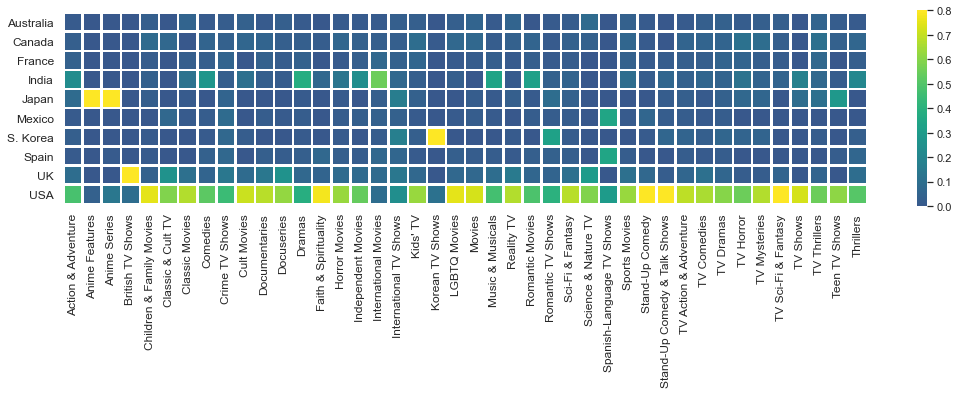

In [162]:
plt.figure(figsize=(18, 12))
sns.set(font_scale=1)
sns.heatmap(gen_cross, cmap='viridis', square=True, linewidths=1.5,cbar_kws={"shrink": 0.3}, center=0.25, vmax=.8,)


plt.xlabel('')
plt.ylabel('')
sns.set(font_scale=1)
plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    labelsize=12)

It is interesting to see popularity of various genres in different countries. As we can see that typically Korean dramas are more popular in South Korea. Japan is more into Anime movies and TV shows. British TV shows engages more user from England. Largest number of international movies are from India. One of the key insight this heatmap gives is that local contents are more popular in each of their countries. Hence, Netflix should focus on catering tailor made need for each geographic region.

### Correlation between Genres
features we wanted analyze is correlation between the different Genres. It is very important to understand relationship between one genre to another. 

There are 20 types in the Netflix Movie Dataset


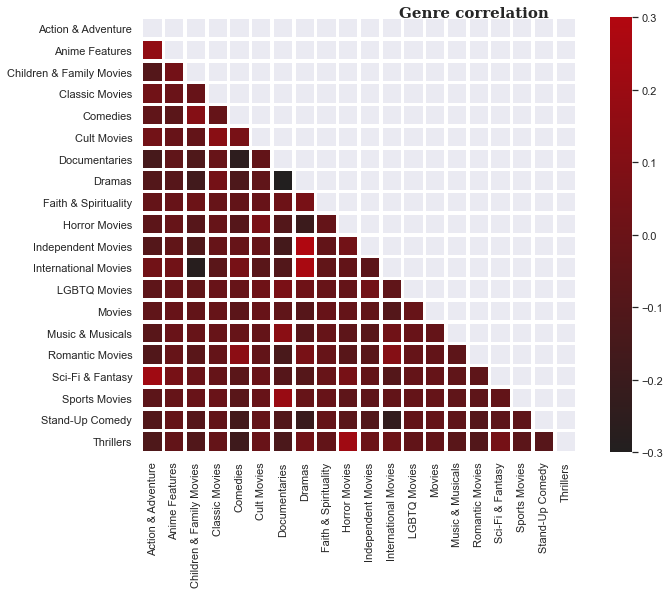

In [163]:
def genre_heatmap(df, title):
    df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
    Types = []
    for i in df['genre']: Types += i
    Types = set(Types)
    print("There are {} types in the Netflix {} Dataset".format(len(Types),title))    
    test = df['genre']
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)
    corr = res.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(12, 8))
    fig.text(.54,.88,'Genre correlation', fontfamily='serif',fontweight='bold',fontsize=15)

    pl = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, vmin=-.3, center=0, square=True, linewidths=2.5)
    
    plt.show()
    
df_tv = df[df["type"] == "TV Show"]
df_movies = df[df["type"] == "Movie"]


genre_heatmap(df_movies, 'Movie')
plt.show()

we can see that certain genres are correlated with one another. For example, independent movies are more tend to drama movies. 

## WordCloud to identify most common themes or title
These visualization does not provide much insight, but it would be intresting to see what are common words in titles.

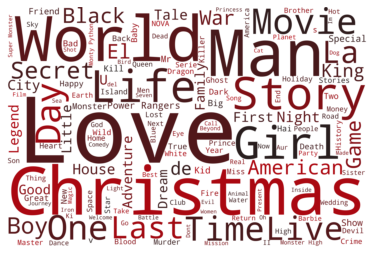

In [119]:
from wordcloud import WordCloud
import random
from PIL import Image
import matplotlib

# Custom colour map based on Netflix palette
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710'])

text = str(list(df['title'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')

mask = np.array(Image.open('data/Netflix-Logo-2006.png'))

wordcloud = WordCloud(background_color = 'white', width = 500,  height = 200,colormap=cmap, max_words = 150, mask = mask).generate(text)

plt.figure( figsize=(5,5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Merging with IMDB data

The original dataset contains several categorical columns. However, we could not find feature related to IMDB rating. IMDB rating shows content popularity and quality index. It is very popular gauge viewer often check before spending time to watch the content. None of the earlier existing visualization we have searched contains combination of Netflix Content and IMDB rating. Based on content title, both the tables can be joined, and we can see top content producing countries with their average ratings.

In [127]:
imdb.drop_duplicates(inplace=True)
imdb.dropna(inplace=True)
joint_data=imdb.merge(df,left_on='primaryTitle',right_on='title',how='inner')
joint_data=joint_data.sort_values(by='averageRating', ascending=False)

joint_group = joint_data.groupby(by='first_country', as_index=False)['country', 
                                                                     'averageRating'].agg(
{'country':'count', 'averageRating':'mean'})
joint_group = joint_group[joint_group['country'] > 200].sort_values(by = 'averageRating', ascending=False).reset_index(drop=True)
joint_group

,first_country,country,averageRating
0,Japan,318,7.065094
1,Australia,413,7.037046
2,Taiwan,233,7.025751
3,S. Korea,685,6.982920
4,Brazil,255,6.973725
5,Italy,297,6.968350
6,UK,2210,6.953846
7,Turkey,343,6.944023
8,France,832,6.909615
9,USA,10697,6.888268


In [125]:
import plotly.express as px
top_rated=joint_group[0:10]
fig =px.sunburst(
    top_rated,
    path=['first_country'],
    values='averageRating',
    color='averageRating')
fig.show()

It would be interesting to see average movie rating for each country and how that rate on IMDB scale. We have filtered countries who has at least 100+ digital content available on Netflix. Before we were getting countries like Iran, but they have not enough content on Netflix. Hence, we filtered only countries of origin with 100+ titles. It is seen that average rating for Japan is slightly above 7. With USA, producing largest number of digital contents, ranks at bottom 10. Netflix have potential opportunities to make available high rated movies and TV-shows on their platforms which can increase user engagement level.

## Conclusion

This paper tries to address strategy for Netflix to increase user engagement level. This paper solely suggest strategy based on available content data on Netflix. Since more people are constantly binge-watching TV shows or movies, it is constant pressure on Netflix to add new contents. Also, content need for eere ach geographical region is different. Hence, this paper provides insight considering different needs of different geographic regions.

One of the prime reasons we observed is that new content addition growth is significantly declined on Netflix in recent years. It could be effect of global pandemic, however, there is constant need for entertainment and for that Netflix should constantly add new contents. This paper does not consider content that were on Netflix and already removed due to unavailability of those information.

Binge-watching is constantly growing. Most users complete 10-12 episodes of TV-series in one weekend. Hence, it is very important to release content at ideal time. This article identifies that ideal time for releasing new content in December and January. It is noted that there is no significant difference for movie content between other months vs months with Major Holiday. However, demand for TV-show is high during the month of December and January. As there are majority of subscribers of Netflix from USA, and USA does observe several holidays during this month, it is ideal time for releasing new content. In terms of weekdays, Friday is clearly a winner. As most of users observes weekends on Saturday and Sunday, Friday is by far the best day to release new content. 

In this paper, we have also analyzed correlation between several important features. We have analyzed correlation between different genres. This correlation provides important insights regarding related genres. Netflix can use this insight to find likelihood of user’s preference. It is very likely that users fond of one genre may be interested in similar genres and this could play huge role in their recommendations system. Also, correlation between the different countries and genres is also interesting. It is observed that majority countries prefer their local content. Also, some genres are more popular in one country then another. However, it is noted that majority of content produced by USA and hence, there is a chance of biased conclusion here. It is recommended to perform thorough analysis for these features before implementing any strategy.
This paper also addresses potential untapped market that Netflix should focus on. It is observed that there is very less content available for kids. Adding more contents related to kids will increase Netflix user engagement level. We have analyzed correlation between countries and targeted age group for Netflix content. For majority of countries, Netflix content is highly focused on adult. However, kids and teenagers can be engaged if Netflix add more relevant content for these age groups. This is a great opportunity for Netflix.

In summary, article addresses few important strategies that Netflix can implement to increase user engagement level. At the same time, it is important to note that Netflix should not rely on just content information. They should combine this information with other data such user demographic, engagement duration as well as revenues. This will help Netflix to get back on track and improve company’s financials.
